In [54]:
#importing pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#importing dataset with read_csv method
#viewing first five rows of the dataset
heart_ds = pd.read_csv('heart_failure_dataset.csv')
print(heart_ds.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [56]:
# Inspecting the dataset by printing its structure, summary statistics, 
#and the distribution of the target variable (DEATH_EVENT). 

heart_ds.info()
heart_ds.describe()
heart_ds['DEATH_EVENT'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [57]:
# Separating the dataset into input features (X) and the target label (y).

X = heart_ds.drop('DEATH_EVENT', axis=1)
y = heart_ds['DEATH_EVENT']

In [58]:
# Splitting the dataset into training and testing sets. 
# 80% of the data is used for training and 20% for testing.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
# Define the list of continuous numerical features that require scaling before
# training the neural network.

continuous_cols = [
    'age', 'creatinine_phosphokinase', 'ejection_fraction',
    'platelets', 'serum_creatinine', 'serum_sodium', 'time'
]

In [60]:
# Standardize the continuous numerical features to improve neural network training.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test_scaled[continuous_cols] = scaler.transform(X_test[continuous_cols])

In [61]:
# Converting the scaled training and test data into PyTorch tensors and wrapping them
# in TensorDataset objects so they can be fed into DataLoader.

import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_t = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_test_t = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_ds = TensorDataset(X_train_t, y_train_t)
test_ds = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32)

In [62]:
# Defining a feed‑forward neural network (MLP) for binary classification.
class HeartMLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(16, 1)
        )
        
    def forward(self, x):
        return self.net(x)

In [63]:
# Setting up the loss function and optimizer for training the neural network.

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [23]:
# Train the neural network for 50 epochs using mini‑batches from the DataLoader.

for epoch in range(50):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.6981
Epoch 2, Loss: 0.6748
Epoch 3, Loss: 0.6561
Epoch 4, Loss: 0.6359
Epoch 5, Loss: 0.5871
Epoch 6, Loss: 0.5607
Epoch 7, Loss: 0.5824
Epoch 8, Loss: 0.5211
Epoch 9, Loss: 0.4316
Epoch 10, Loss: 0.3733
Epoch 11, Loss: 0.3990
Epoch 12, Loss: 0.5194
Epoch 13, Loss: 0.4261
Epoch 14, Loss: 0.2573
Epoch 15, Loss: 0.2932
Epoch 16, Loss: 0.5011
Epoch 17, Loss: 0.3871
Epoch 18, Loss: 0.2266
Epoch 19, Loss: 0.4236
Epoch 20, Loss: 0.2170
Epoch 21, Loss: 0.3716
Epoch 22, Loss: 0.3006
Epoch 23, Loss: 0.3016
Epoch 24, Loss: 0.4682
Epoch 25, Loss: 0.2259
Epoch 26, Loss: 0.3967
Epoch 27, Loss: 0.2565
Epoch 28, Loss: 0.3736
Epoch 29, Loss: 0.3609
Epoch 30, Loss: 0.4299
Epoch 31, Loss: 0.1155
Epoch 32, Loss: 0.2372
Epoch 33, Loss: 0.3929
Epoch 34, Loss: 0.2159
Epoch 35, Loss: 0.2779
Epoch 36, Loss: 0.3295
Epoch 37, Loss: 0.1535
Epoch 38, Loss: 0.2536
Epoch 39, Loss: 0.2796
Epoch 40, Loss: 0.3915
Epoch 41, Loss: 0.1928
Epoch 42, Loss: 0.3381
Epoch 43, Loss: 0.3141
Epoch 44, Loss: 0.11

In [64]:
# Switch the model to evaluation mode
model.eval()

HeartMLP(
  (net): Sequential(
    (0): Linear(in_features=12, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [65]:
# Run the trained model on the test set to collect predictions for evaluation.
# Gradients are disabled for efficiency.
import torch
import numpy as np

all_preds = []
all_probs = []
all_targets = []

with torch.no_grad():
    for xb, yb in test_loader:
        logits = model(xb)
        probs = torch.sigmoid(logits)

        all_probs.extend(probs.squeeze().numpy())
        preds = (probs > 0.20).int()
        all_preds.extend(preds.squeeze().numpy())
        all_targets.extend(yb.squeeze().numpy())

In [66]:
# Compute class weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Weighted loss
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])

In [67]:
# Compute key evaluation metrics for the model's test‑set performance.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(all_targets, all_preds)
precision = precision_score(all_targets, all_preds)
recall = recall_score(all_targets, all_preds)
f1 = f1_score(all_targets, all_preds)
auc = roc_auc_score(all_targets, all_probs)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {auc:.4f}")

Accuracy:  0.8000
Precision: 0.6522
Recall:    0.7895
F1-score:  0.7143
ROC-AUC:   0.8678


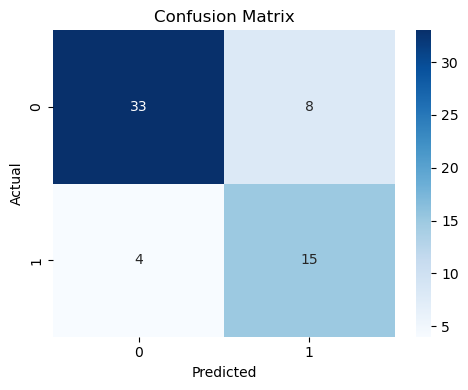

In [68]:
# Computing the confusion matrix and visualizing it as a heatmap to show how often
# the model correctly or incorrectly predicts each class.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_targets, all_preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
# Save the figure BEFORE showing it
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)

plt.show()

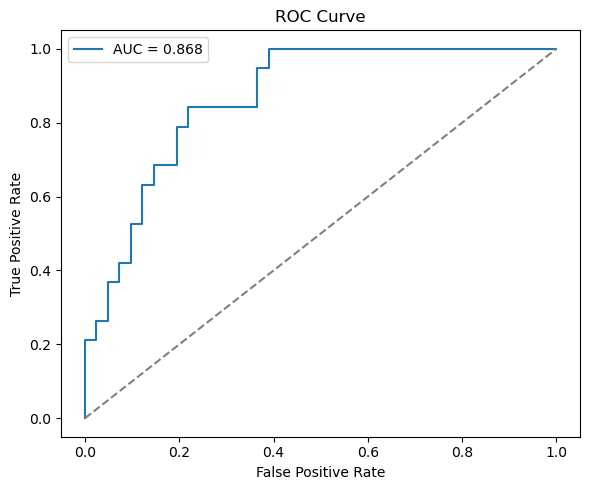

In [69]:
# Computes and plots the ROC curve to evaluate the model’s ability to distinguish
# between the positive and negative classes across all decision thresholds.

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(all_targets, all_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.savefig("roc_curve.png", dpi=300)

plt.show()

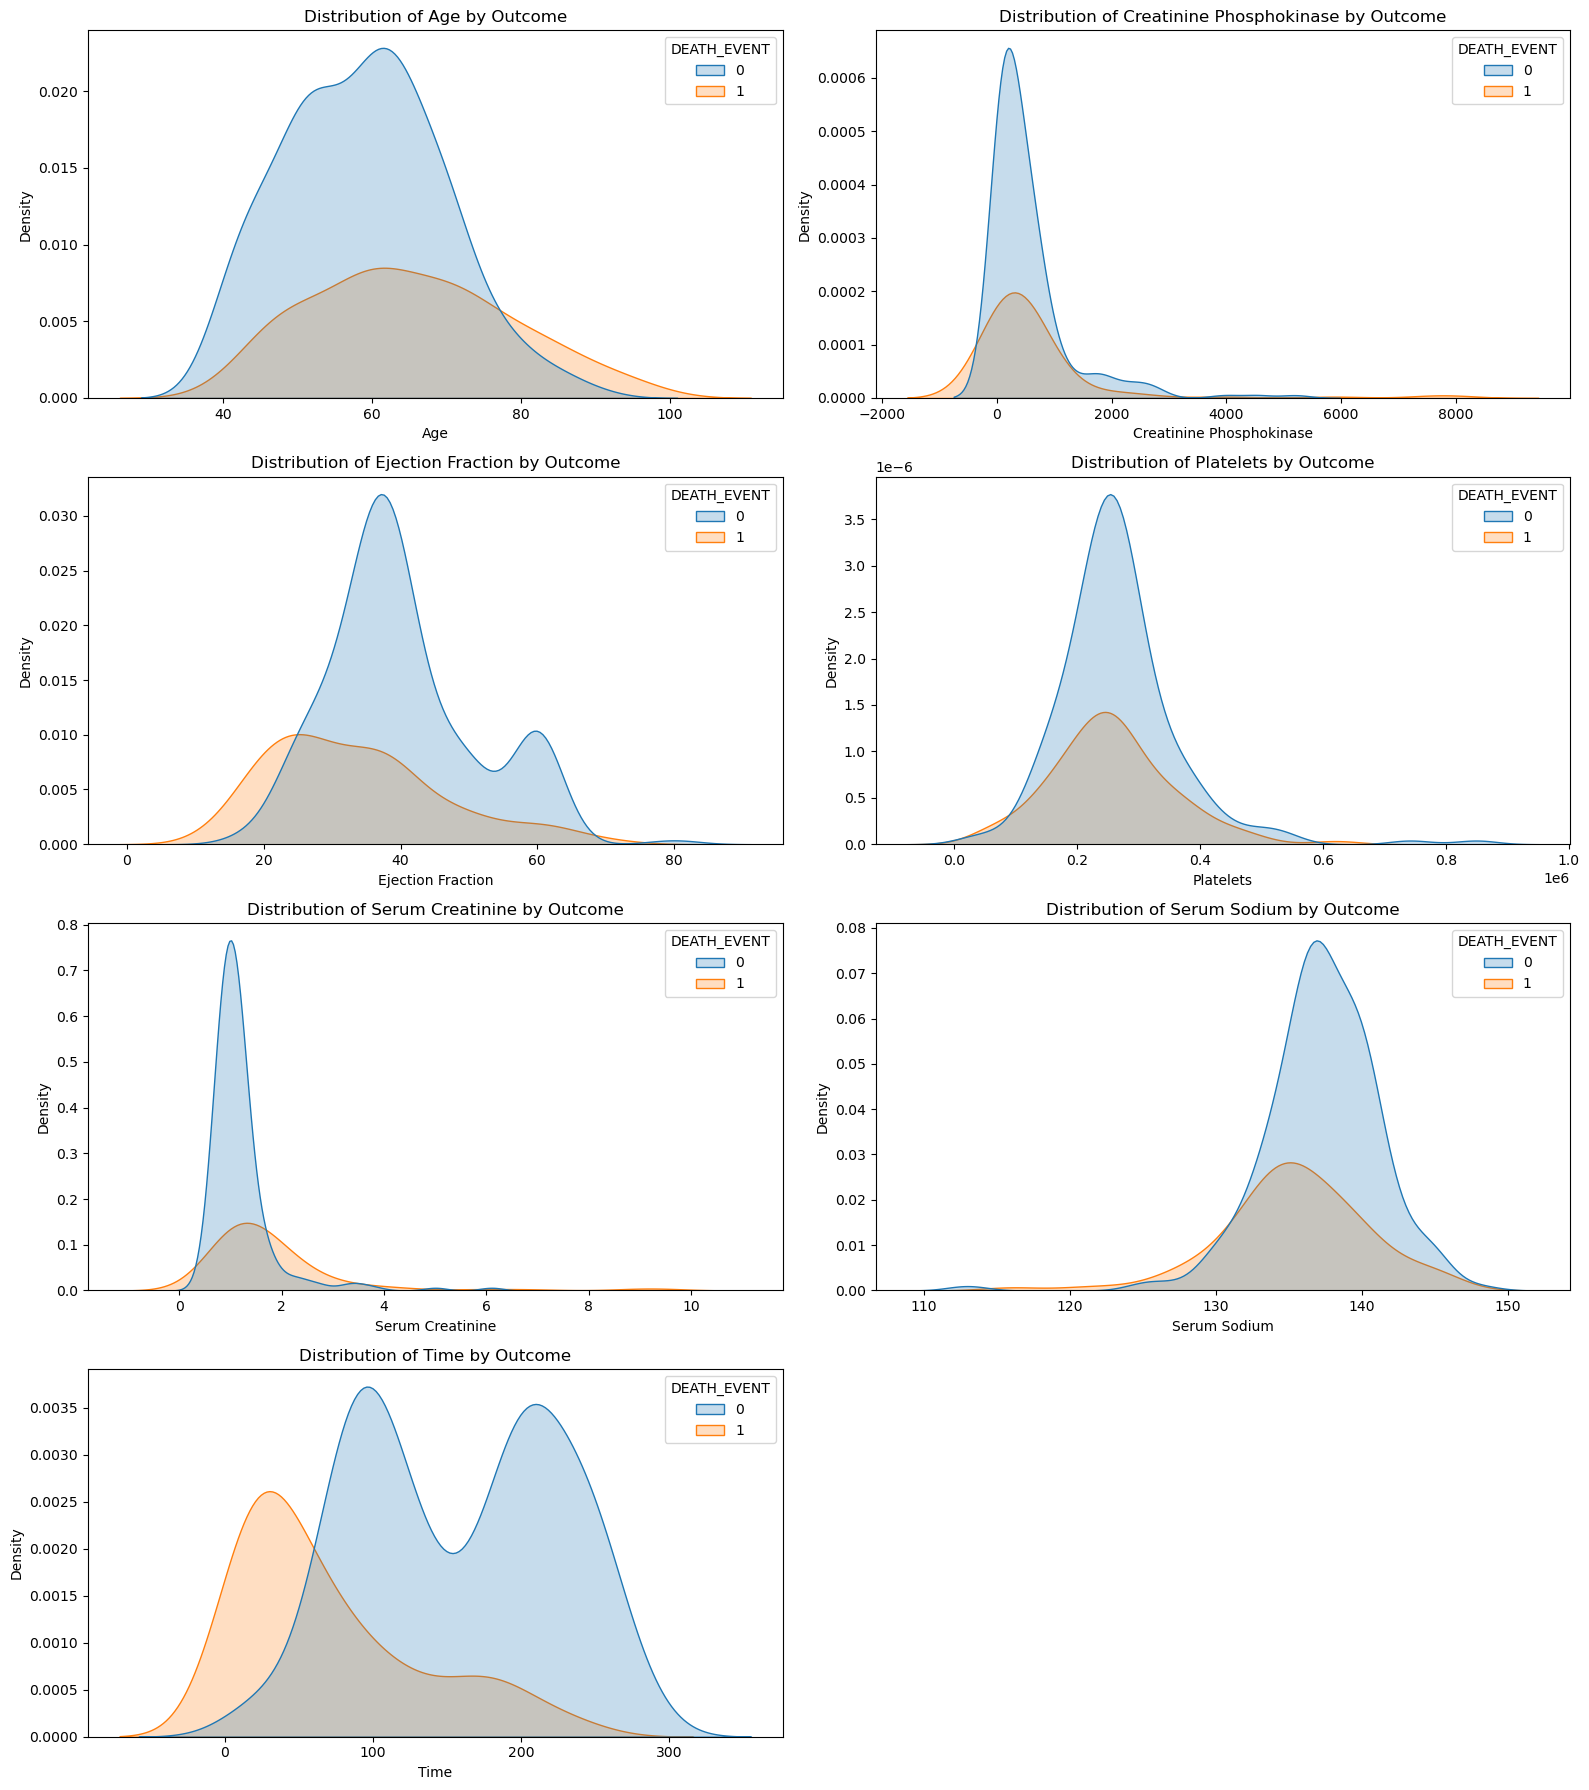

In [19]:
# KDE plot for continuous features comparing survivors vs non-survivors
continuous_cols = [
    'age', 'creatinine_phosphokinase', 'ejection_fraction',
    'platelets', 'serum_creatinine', 'serum_sodium', 'time'
]

plt.figure(figsize=(16, 18))

for i, col in enumerate(continuous_cols, 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(data=heart_ds, x=col, hue='DEATH_EVENT', fill=True)
    plt.title(f"Distribution of {col.replace('_', ' ').title()} by Outcome")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

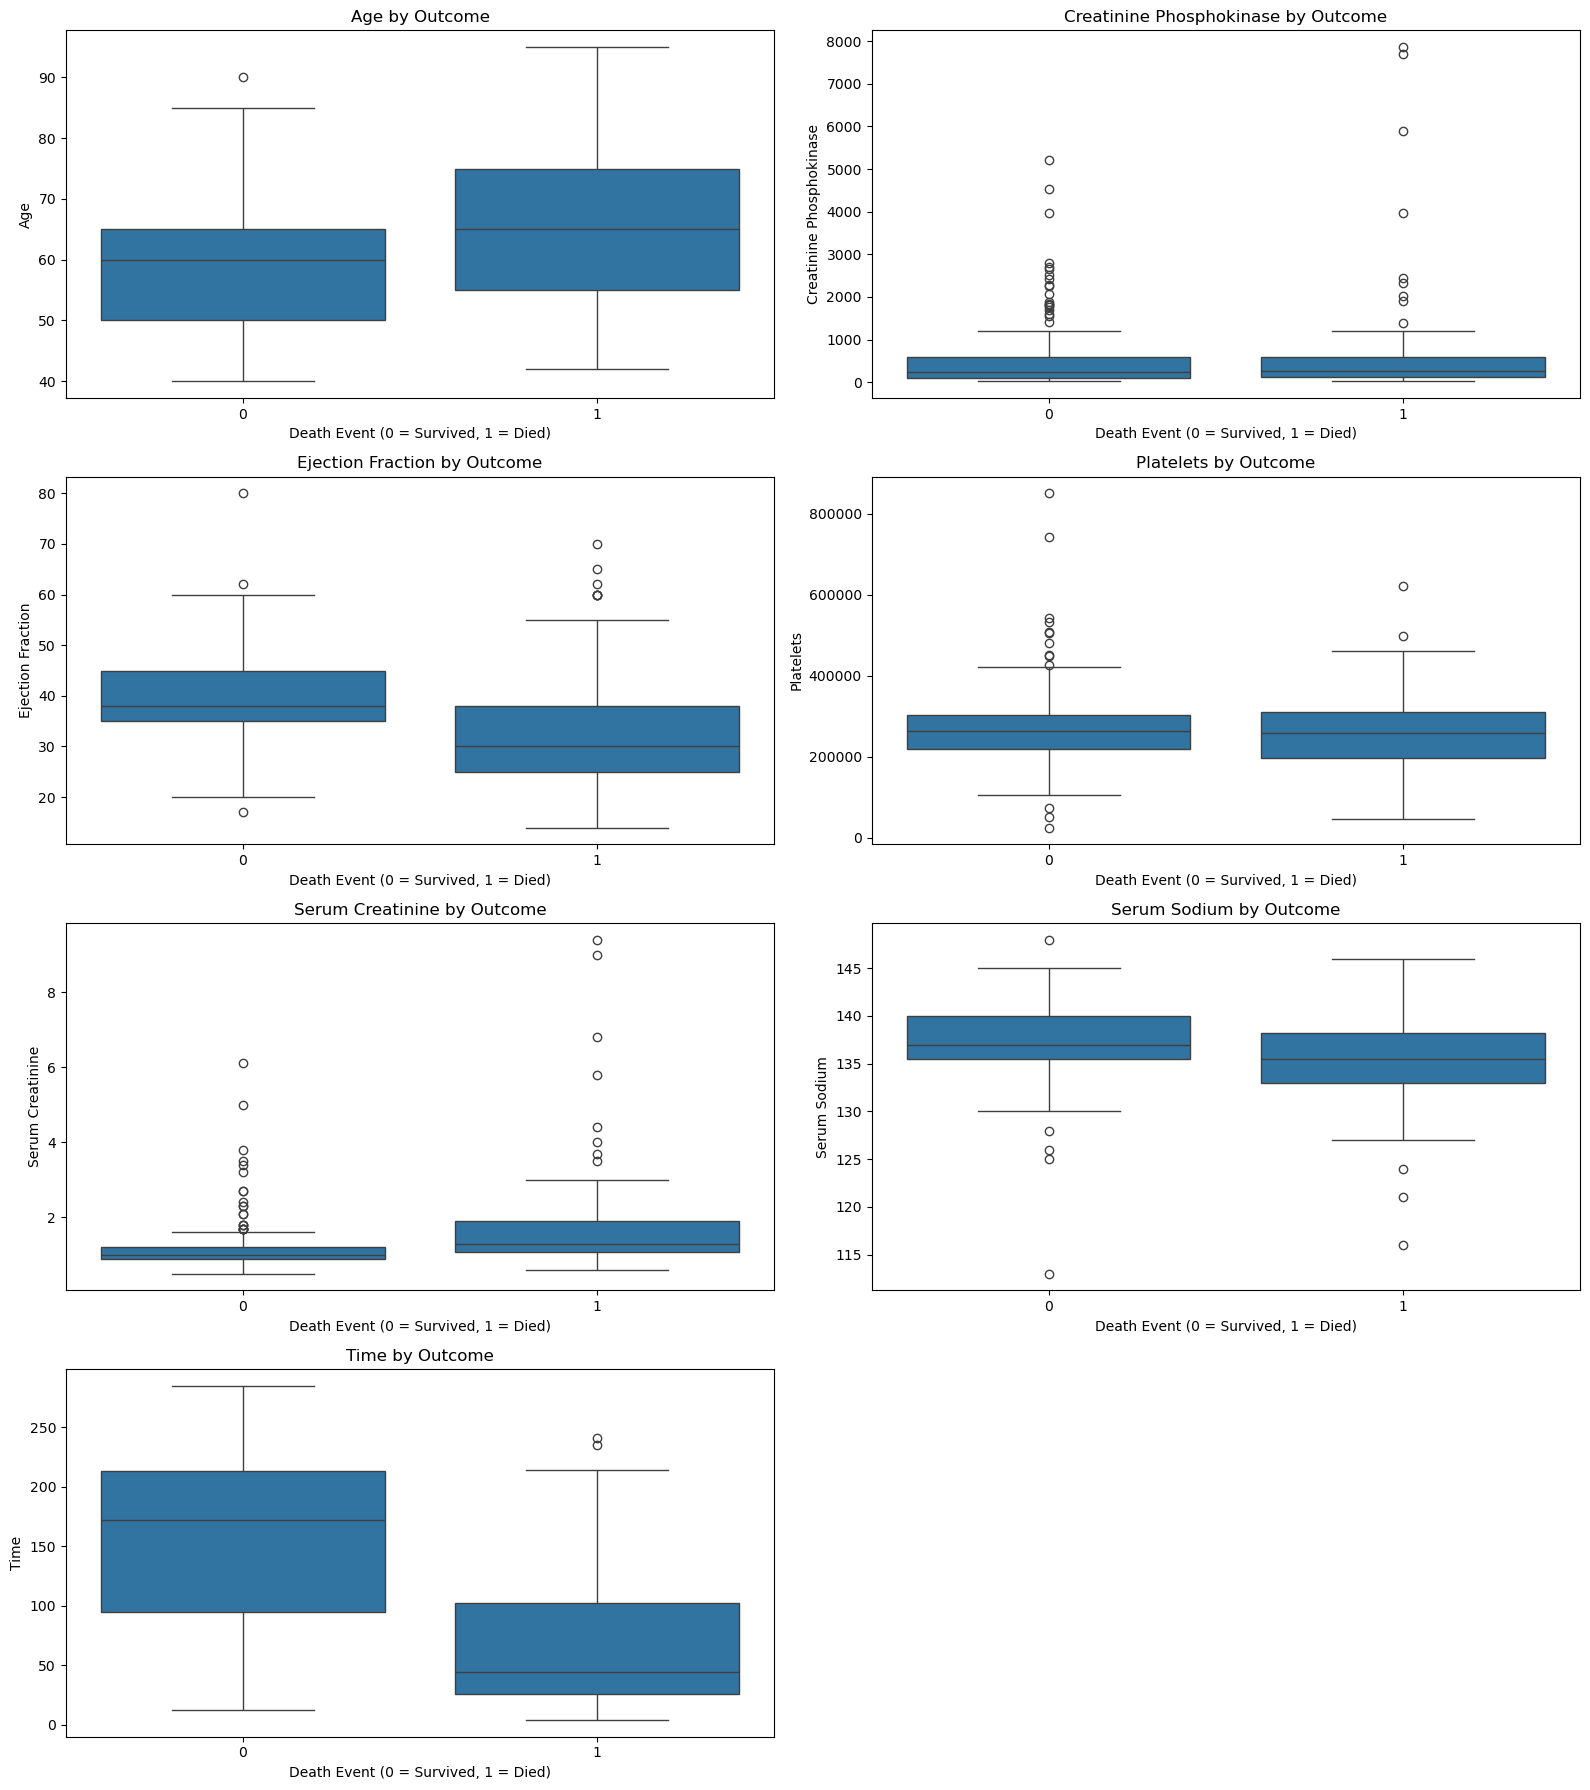

In [70]:
# Boxplots showing how each continuous feature differs by survival outcome
plt.figure(figsize=(16, 18))

for i, col in enumerate(continuous_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=heart_ds, x='DEATH_EVENT', y=col)
    plt.title(f"{col.replace('_', ' ').title()} by Outcome")
    plt.xlabel("Death Event (0 = Survived, 1 = Died)")
    plt.ylabel(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()

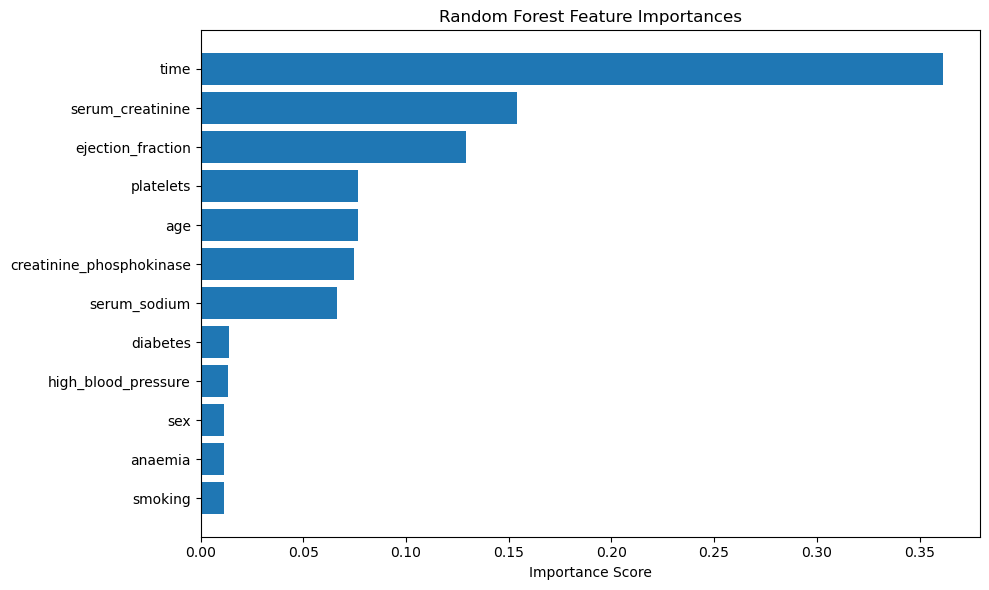

In [73]:
# Train a quick Random Forest to extract feature importances
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

importances = rf.feature_importances_
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

Epoch 1, Loss: 0.3161
Epoch 2, Loss: 0.3020
Epoch 3, Loss: 0.1792
Epoch 4, Loss: 0.3590
Epoch 5, Loss: 0.4899
Epoch 6, Loss: 0.4534
Epoch 7, Loss: 0.2234
Epoch 8, Loss: 0.3414
Epoch 9, Loss: 0.0899
Epoch 10, Loss: 0.1915
Epoch 11, Loss: 0.2212
Epoch 12, Loss: 0.2603
Epoch 13, Loss: 0.2108
Epoch 14, Loss: 0.3296
Epoch 15, Loss: 0.1801
Epoch 16, Loss: 0.0904
Epoch 17, Loss: 0.2353
Epoch 18, Loss: 0.7034
Epoch 19, Loss: 0.2726
Epoch 20, Loss: 0.3567
Epoch 21, Loss: 0.1270
Epoch 22, Loss: 0.2047
Epoch 23, Loss: 0.3292
Epoch 24, Loss: 0.2533
Epoch 25, Loss: 0.3307
Epoch 26, Loss: 0.3274
Epoch 27, Loss: 0.1247
Epoch 28, Loss: 0.1764
Epoch 29, Loss: 0.1161
Epoch 30, Loss: 0.0870
Epoch 31, Loss: 0.2535
Epoch 32, Loss: 0.2593
Epoch 33, Loss: 0.1090
Epoch 34, Loss: 0.3807
Epoch 35, Loss: 0.1677
Epoch 36, Loss: 0.2465
Epoch 37, Loss: 0.1768
Epoch 38, Loss: 0.3988
Epoch 39, Loss: 0.5096
Epoch 40, Loss: 0.3560
Epoch 41, Loss: 0.3013
Epoch 42, Loss: 0.5099
Epoch 43, Loss: 0.4520
Epoch 44, Loss: 0.11

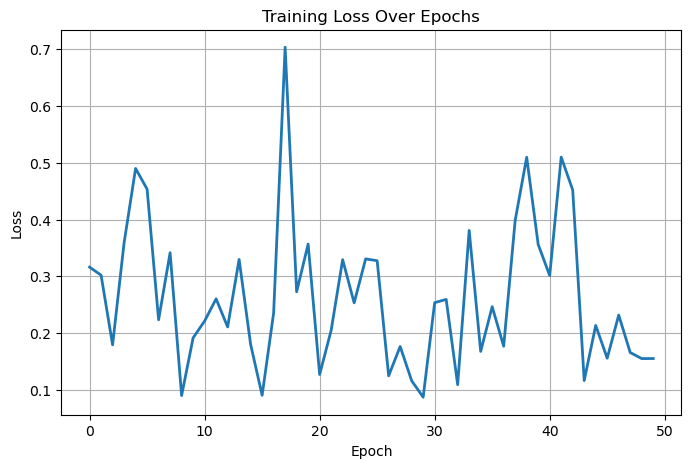

In [76]:
loss_history = []

for epoch in range(50):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
    
    # Store the loss for plotting later
    loss_history.append(loss.item())
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


plt.figure(figsize=(8, 5))
plt.plot(loss_history, linewidth=2)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()